## TEST ESTADISTICOS

---

In [1]:
# ============================================
import pandas as pd
import numpy as np

# librerías para la visualización de los datos
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer tamaño fijo de gráficas
# ==================================
plt.rcParams["figure.figsize"] = (10,8)

# Configuración warnings
# ======================
import warnings

from scipy.stats import skew

from scipy.stats import kurtosistest

from scipy import stats

pd.options.display.max_columns = None

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('../files/desarrollados.csv', index_col=0)

In [3]:
numericas = df.select_dtypes(include= np.number)

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis ayer.

## 1) ¿Qué diferencia existe el error de tipo I y el error de tipo II?

Error de tipo I: la probabilidad de rechazar la H0 siendo verdadera

Error de tipo II: la probabilidad de aceptar la H0 siendo falsa

## 2) ¿Qué es la asimetría?

La asimetría es la falta de simetría que presenta una distribución teniendo en cuenta la media

Cuando utilizemos el método anterior podemos obtener resultados positivos, negativos o cero.

- **Distributión simétrica**: si el valor es de 0, los datos serán simétricos, y por lo tanto, tienen una distribución normal. 


- **Distribución asimétrica positiva**: si el valor es positivo, los datos serán asimétricos positivos, y por lo tanto, no son normales. 


- **Distribución asimétrica negativa**: si el valor es negativo, los datos serán asimétricos negativos, y por lo tanto, no son normales.

In [7]:
numericas.isnull().sum()

index                                0
year                                 0
life_expectancy                      0
adult_mortality                      0
infant_deaths                        0
alcohol                             28
percentage_expenditure               0
hepatitis_b                        173
measles                              0
bmi                                  0
under-five_deaths                    0
polio                                0
total_expenditure                   32
diphtheria                           0
hiv/aids                             0
gdp                                 64
population                          96
thinness__1-19_years                 0
thinness_5-9_years                   0
income_composition_of_resources     48
schooling                           48
dtype: int64

In [6]:
skew(numericas)

array([-0.18755294,  0.        ,  0.09455442,  0.68285298,  4.97202275,
               nan,  1.87508358,         nan,  8.86591197, -1.90142776,
        4.95851458, -6.72740887,         nan, -6.0255104 ,         nan,
               nan,         nan,  0.82155823,  0.93037747,         nan,
               nan])

In [8]:
for i in numericas.columns:
    if skew(numericas[i])== 0:
        print( f" La variable {i} tiene una distribución simetrica (Es normal)")

        #lista_normales.append(i)
    elif skew(numericas[i])> 0:
        print( f" La variable {i} tiene una distribución asimetrica positiva (No es normal)")
    
    elif skew(numericas[i])< 0:
        print( f" La variable {i} tiene una distribución asimetrica negativa (No es normal)")
    else:
        pass

 La variable index tiene una distribución asimetrica negativa (No es normal)
 La variable year tiene una distribución simetrica (Es normal)
 La variable life_expectancy tiene una distribución asimetrica positiva (No es normal)
 La variable adult_mortality tiene una distribución asimetrica positiva (No es normal)
 La variable infant_deaths tiene una distribución asimetrica positiva (No es normal)
 La variable percentage_expenditure tiene una distribución asimetrica positiva (No es normal)
 La variable measles tiene una distribución asimetrica positiva (No es normal)
 La variable bmi tiene una distribución asimetrica negativa (No es normal)
 La variable under-five_deaths tiene una distribución asimetrica positiva (No es normal)
 La variable polio tiene una distribución asimetrica negativa (No es normal)
 La variable diphtheria tiene una distribución asimetrica negativa (No es normal)
 La variable thinness__1-19_years tiene una distribución asimetrica positiva (No es normal)
 La variable 

## 3) ¿Es vuestra variable respuesta asimétrica?

In [12]:
skew(df['life_expectancy'])

0.094554424644433

EL pvalor es mayor a 0.05 por lo tanto rechazamos la H0, y tienen simetria

## 4) ¿Qué tipo de curtosis presenta vuestra variable respuesta?

In [14]:
kurtosistest(df['life_expectancy'])

KurtosistestResult(statistic=-0.49256031313779486, pvalue=0.6223232958791044)

EL pvalor es mayor a 0.05 por lo tanto aceptamos la H0, teniendo leptocurtosis. Tiene una morfología afilada.
Los datos son normales con un intervalo de confianza del 95%.

## 5) ¿Es vuestra variable respuesta normal? Demostrarlo visual y analíticamente?

In [15]:
stats.shapiro(df["life_expectancy"])

ShapiroResult(statistic=0.984403133392334, pvalue=2.6695464839576744e-05)

Al ser pvalue mayor a 0.05 no podemos rechazar H0, por lo tanto nuestras datos tienen una distribución normal con un intervalo de confianza del 95%.

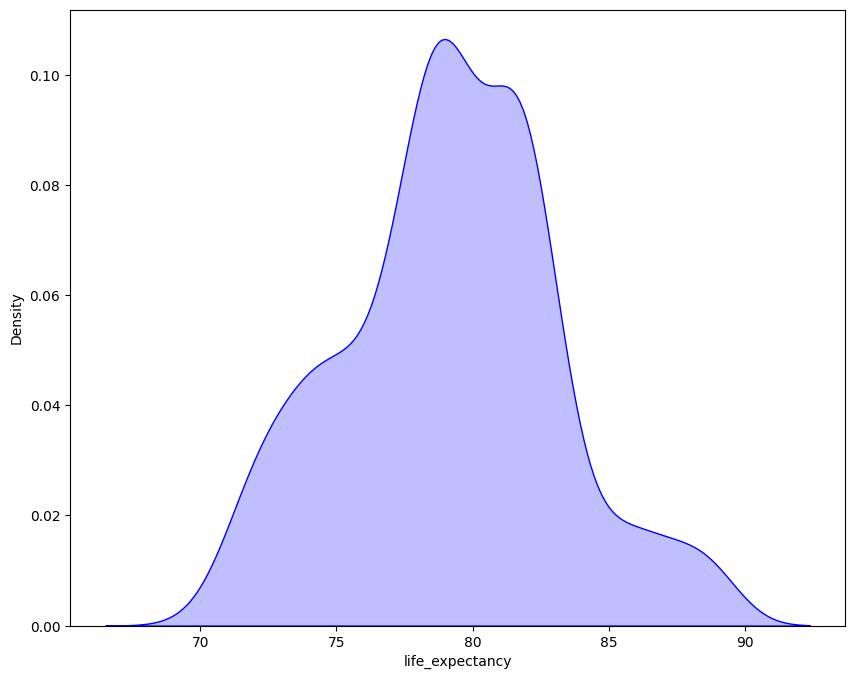

In [16]:
sns.distplot(
    df["life_expectancy"], 
    hist = False, 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1});

Un análisis gráfico muestra cierta normalidad al ser cercana a una campa de Gauss